<h1 style="text-align:center">
    Tasas de paro en España
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Javier López Bahón
</h3>
<h3 style="text-align:center">
    16/03/2021
</h3>

    
<hr>

## Introducción
<br>
<font color="darkblue">
En el siguiente scrip se estudia los datos del paros del INE. Las explicaciones en relación a los diferentes procesos se irán en encontrando a lo largo del scrip.

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="450">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>01 Andalucía</th>
    <th>Menores de 25 años</th>
    <th>Ambos sexos</th>
    <th>2020T3</th>
    <th>51,53</th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con ella. En primer lugar, hay que desglosar este string en una lista de los elementos que contiene:

    ['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2020T3', '51,53']

Luego habría que eliminar la componente de "ambos sexos", que es igual en todas las filas:

    ['01 Andalucía', 'Menores de 25 años', '2020T3', '51,53']

También, la última componente es un string, pero nos interesará manejar este dato como un real:

    ['01 Andalucía', 'Menores de 25 años', '2020T3', 51.53]

Finalmente, queremos eliminar el código de la comunidad autónoma:

    ['Andalucía', 'Menores de 25 años', '2020T3', 51.53]
    
Todas estas operaciones podrían agruparse en una función `linea_a_datos`, que trabajaría como muestra la prueba de funcionamiento posterior:

In [1]:
# Este apartado debe ser completado por el estudiante

def linea_a_datos(datos):
    """
    Esta función divide, un dato tipo str, por cada ";" que aparezca, eliminando la numeración de la Com Aut y
    convierte la tasa de paro en un float.
    
    Parameters
    ----------
    datos : str
    
    Returns
    -------
    datos_salida : (str,str,str,float)
    Comunidad Autónoma, Rango de edad,  Periodo, Tasa de paro
    
    
    Precondition
    ------------
    datos : str
    
    Ejemplo
    -------
    >>>linea = "01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53"
    >>>print(linea_a_datos(linea))
    Out: ['Andalucía', 'Menores de 25 años', '2020T3', 51.53]
    """
    datos = datos.split(';')
    while datos[0] != [] and not datos[0][0].isalpha():
        datos[0] = datos[0][1:]
    datos[4] = float(datos[4].replace(',','.'))
    del datos[2]
    return datos

<font color="darkblue">
Separo con un split y limpio los datos.

In [2]:
# Pruebas de funcionamiento:

linea = "01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53"
print(linea_a_datos(linea))

linea = "19 Melilla;De 25 a 54 años;Ambos sexos;2011T4;21,23"
print(linea_a_datos(linea))

['Andalucía', 'Menores de 25 años', '2020T3', 51.53]
['Melilla', 'De 25 a 54 años', '2011T4', 21.23]


Seguimos con las operaciones básicas.

Deseamos convertir cada intervalo de edad en un par numérico:

    "Menores de 25 años" -> (0, 24)
    "25 y más años"      -> (25, 70)
    "De 16 a 19 años"    -> ...
    "De 20 a 24 años"
    "De 25 a 54 años"
    "55 y más años"
    
(Hemos puesto 70 años como edad de la jubilación.) Un diccionario puede facilitar esta operación, pues el número de casos es tan reducido que no nos entretenemos en hacer una función más genérica.

A estas alturas, no sabemos si será necesario convertir el período dado en la tabla en un par de enteros, uno para el año y otro para el trimestre. Pero te pido que diseñes la función por si acaso:

    "2016T1" -> (2016, 1)
    "2019T4" -> (2019, 4)

In [3]:
# Este apartado debe ser completado por el estudiante

edad_a_intervalo = {
    "Menores de 25 años" : (0, 24),
    "25 y más años" : (25, 70),
    "De 16 a 19 años" : (16,19),
    "De 20 a 24 años" : (20,24),
    "De 25 a 54 años" : (25,54),
    "55 y más años" : (55,70),        
}

def anno_trimestre(txt):
    """
    Separa el año y el trimestre de un dato tipo str (ex: 2020T2), les divide por la T, y lo retorna en una tupla de dimensión 2.
    
    Parameters
    ----------
    txt : str
    
    Returns
    -------
    (int,int)
    año,trimestre
    
    Precondition
    ------------
    txt : str => Example: 2020T2
    
    Example
    ------------
    >>>>anno_trimestre(2020T2) 
    Out: (2020,2)
    """
    txt = txt.split('T')
    txt[0],txt[1] = int(txt[0]),int(txt[1])
    return (txt[0],txt[1])


<font color="darkblue">
En este bloque genero un diccionario para pasar los str de edad a un valor (int,int), permitiendome trabajar más facilmente con los datos, y creo la función <i> anno_trimestre </i> donde al igual que en el bloque anterior con .split divido la fecha en (int,int)

In [4]:
# Pruebas de funcionamiento:

print(edad_a_intervalo["Menores de 25 años"])
print(edad_a_intervalo["De 20 a 24 años"])
print(".............")
print(anno_trimestre("2013T1"))
print(anno_trimestre("2019T4"))

(0, 24)
(20, 24)
.............
(2013, 1)
(2019, 4)


Ahora se puede redefinir la función `linea_a_datos` con estos detalles.

In [5]:
# Este apartado debe ser completado por el estudiante

def linea_a_datos(datos):
    """
    Limpia los datos de cada línea, para ello divide los datos por cada ";", y lo guarda en una tupla. 
    Después para cada dato de la tupla realiza una función:
    datos[0] : Retira la numeración y los espacios.
    datos[1] : Pasa el str del tipo de edad a una tupla con el intervalo de edad de forma numérica.
    datos[2] : Elimina el dato por falta de relavancia.
    datos[3] : Aplica la función anno_trimestre
    datos[4] : Convierte el dato en un float.
    
    Parameters
    ----------
    datos : (str,str,str,str,str)
    Comunidad Autónoma, Rango de edad, Sexo, Periodo, Tasa de paro
    
    Returns
    -------
    (str,(int,int),(int,int),float)
    Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre), Tasa de paro
    
    Precondition
    ------------
    txt : str => Example: "01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53"
    
    Example
    ------------
    >>>linea_a_datos("01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53")
    ['Andalucía', (0, 24), (2020, 3), 51.53]
    """    
    datos = datos.split(';')
    while datos[0] != [] and not datos[0][0].isalpha():
        datos[0] = datos[0][1:]
    datos[1] = edad_a_intervalo[datos[1]]
    datos[3] = anno_trimestre(datos[3])
    datos[4] = float(datos[4].replace(',','.'))
    del datos[2]
    return datos

<font color="darkblue">
Primero separo la linea, a continuación elimino los números del str de Com Aut con un bucle que va eliminando palabras de derecha a izquierda hasta que se encuentra con una palabra. Con el diccionario de antes paso el intervalo de edad a (int,int), utilizo la función <i> anno_trimestre </i> para la fecha y reemplazo los <i>,</i> por <i>.</i> en la tasa de paro para poder convertilo a float.

In [6]:
# Pruebas de funcionamiento:

lineas = ["01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53",
          "19 Melilla;De 25 a 54 años;Ambos sexos;2011T4;21,23"]

for linea in lineas:
    print(linea_a_datos(linea))

['Andalucía', (0, 24), (2020, 3), 51.53]
['Melilla', (25, 54), (2011, 4), 21.23]


**Nota**: Sé que he descrito este apartado con mucho detalle, paso a paso, y además te he proporcionado las pruebas de funcionamiento. A partir de aquí, deberás definir tú los detalles necesarios de cada apartado, tomando las decisiones de diseño que creas oportunas.

También, te he proporcionado los ejemplares de prueba. Pero en realidad eres tú quien debe aportarlos. Y además te recomiendo que pienses en los ejemplares de prueba antes incluso de completar el código, pues son casos concretos, útiles para precisar lo que uno se dispone a hacer. En los apartados que siguen, te damos algunos ejemplares, sólo ya puntualmente, y cada vez con menos detalle.

## b) Lectura básica del archivo csv [1,5 puntos]

Una forma básica de empezar a manejar el archivo de datos csv es leer unas cuantas líneas. Excluimos la primera, que es la línea cabecera.

In [7]:
# Este apartado debe ser completado por el estudiante
import csv

def cargar_lineas(ArchivoDeDatos, empieza, acaba):
    """
    Esta función abre el archivo de datos de paro, y devuelve las filas situadas entre los dos parámetros asignados (empieza,acaba).
    
    Parameters
    ----------
    ArchivoDeDatos : str
        Esto será la dirección o nombre del archivo de datos
    empieza : int
        Linea en la que se desea empezar a mostrar los datos.
    acaba : int
        Linea en la que se desea acabar de mostrar los datos.
    data : []
        Lista en la que iremos guardando las filas que se desean mostrar.
    
    Returns
    -------
    data : []
        Una lista con las filas separadas por ";"
    
    Precondition
    ------------
    empieza < acaba
    ArchivoDeDatos : str => Example: "tabla.csv"
    
    Example
    ------------
    >>>algunos_datos = cargar_lineas(ArchivoDeDatos, 7, 10)
    ['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2019T1', '40,93']
    ['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T4', '45,09']
    ['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T3', '46,00']
    ['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T2', '47,29']
    """
    data = []
    with open(ArchivoDeDatos, 'r') as f:
        f = f.readlines()[empieza:acaba+1]
    for linea in f:
        data.append(linea.strip("\n").split(";"))
    return data
    

<font color="darkblue">
La función abre el archivo de datos, en el intervalo de líneas que se indica, para posteriormente guardarlo y retornar en una lista, separándolo por los <i> ";" </i> y eliminando los saltos de línea.

Seguidamente mostramos una prueba de funcionamiento de la función anterior. Observa que la prueba incluye las dos líneas (primera y última), además de las intermedias.

In [8]:
# Pruebas de funcionamiento.

ArchivoDeDatos = "paro_tabla_1.csv"

algunos_datos = cargar_lineas(ArchivoDeDatos, 7, 10)
for dato in algunos_datos:
    print(dato)

['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2019T1', '40,93']
['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T4', '45,09']
['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T3', '46,00']
['01 Andalucía', 'Menores de 25 años', 'Ambos sexos', '2018T2', '47,29']


Usando las piezas definidas en el apartado anterior, podemos procesar el contenido de estas listas, y redefinir la función de carga para que lo haga a la vez.

In [9]:
# Este apartado debe ser completado por el estudiante

def cargar_lineas(ArchivoDeDatos, empieza, acaba):
    """
    Esta función abre el archivo de datos de paro, y devuelve las filas situadas entre los dos parámetros asignados (empieza,acaba).
    
    
    Parameters
    ----------
    ArchivoDeDatos : str
        Esto será la dirección o nombre del archivo de datos
    empieza : int
        Linea en la que se desea empezar a mostrar los datos.
    acaba : int
        Linea en la que se desea acabar de mostrar los datos.
    data : []
        Lista en la que iremos guardando las filas que se desean mostrar.
    
    Returns
    -------
    (str,(int,int),(int,int),float)
        Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre), Tasa de paro
    
    Precondition
    ------------
    empieza < acaba
    ArchivoDeDatos : str => Example: "tabla.csv"
    
    Example
    ------------
    >>>algunos_datos = cargar_lineas(ArchivoDeDatos, 7, 10)
    ['Andalucía', (0, 24), (2019, 1), 40.93]
    ['Andalucía', (0, 24), (2018, 4), 45.09]
    ['Andalucía', (0, 24), (2018, 3), 46.0]
    ['Andalucía', (0, 24), (2018, 2), 47.29]
    """    
    
    data = []    
    with open(ArchivoDeDatos, 'r') as f:
        f = f.readlines()[empieza:acaba+1]
    for linea in f:
        data.append(linea_a_datos(linea))
    return data

<font color="darkblue">
La misma lectura que en el apartado anterior pero esta vez según incluimos las filas a la lista le aplicamos la función <i>linea_a_datos</i>

In [10]:
# Pruebas de funcionamiento:

algunos_datos = cargar_lineas(ArchivoDeDatos, 7, 10)
for dato in algunos_datos:
    print(dato)

['Andalucía', (0, 24), (2019, 1), 40.93]
['Andalucía', (0, 24), (2018, 4), 45.09]
['Andalucía', (0, 24), (2018, 3), 46.0]
['Andalucía', (0, 24), (2018, 2), 47.29]


## c) Lectura de los datos en un diccionario [1,5 puntos]

c1) Ahora queremos leer **todos** los datos de la tabla pero de un modo más útil: en una estructura de datos que, a partir de la comunidad autónoma, el intervalo de edad y el año y trimestre, nos dé la tasa de paro.

Es posible que al usar ahora esta carga, obtengas un error, quizá aparezca algún dato inesperado... Esto te obligará a replantear alguna de las funciones definidas anteriormente. Razona sobre tus decisiones de diseño. Presenta la función modificada seguidamente, para que podamos ver los cambios, y no olvides incluir algún test. Para este cambio, razona si es posible realizarlo usando una excepción.

In [11]:
# Este apartado debe ser completado por el estudiante

def to_float(cadena):
    """
    Conviete una cadena de números provenientes de un csv en una variable tipo float.
    
    Parameters
    ----------
    cadena : str
    
    Returns
    -------
    float
    
    Precondition
    ------------
    cadena : str => Example: "25,3"
    
    Example
    ------------
    >>>to_float("25,3")
    type: float (25.3)
    """  
    return float(cadena.replace(',','.'))

def linea_a_datos(datos):
    """
    Convierte un linea del archivo 'paro_tabla_1.csv' en un array. Primero lo divide en strings según los ; del csv.
    A la comunidad autónoma le elimina la enumeración
    El intervalo de edad le pasa a un array con el intervalo de edad, mediante un diccionario previamente escrito.
    El periodo lo pasa a un array (año,trimestre)
    Elimina la columana sexo
    Convierte en float los datos de paro, en caso de no leer ningún número el valor pasará a ser 0.0
    
    Parameters
    ----------
    datos : (str,str,str,str,str)
    
    Returns
    -------
    (str,(int,int),(int,int),float)
        Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre), Tasa de paro
    
    Precondition
    ------------
    datos : str => Example: "01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53"
    
    Example
    ------------
    >>>linea_a_datos("01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53")
    ['Andalucía', (0, 24), (2020, 3), 51.53]
    """  
    datos = datos.split(';')
    while datos[0] != [] and not datos[0][0].isalpha():
        datos[0] = datos[0][1:]
    datos[1] = edad_a_intervalo[datos[1]]
    datos[3] = anno_trimestre(datos[3])
    try:
        datos[4] = to_float(datos[4]) 
    except:
        datos[4] = 0.0
    del datos[2]
    return datos

<font color="darkblue">
He supuesto que los datos en los que no hay ningún número la tasa de paro será cero. Ya que si no se ha introducido será porque no hay datos registrados o no es relevante el paro en ese lugar y periodo. Además no encuentro ninguna otra manera con la que poder estimar este dato, asique consideraría en los resultado finales 0.0 como dato nulo, pero introduzco 0.0 para que no me de problemas en el futuro.

In [12]:
# Pruebas de funcionamiento:

linea = "01 Andalucía;Menores de 25 años;Ambos sexos;2020T3;51,53"
print(linea_a_datos(linea))

linea = "18 Ceuta;De 16 a 19 años;Ambos sexos;2017T3;.."
print(linea_a_datos(linea))

['Andalucía', (0, 24), (2020, 3), 51.53]
['Ceuta', (16, 19), (2017, 3), 0.0]


In [13]:
#Prueba
print(linea[2][0])

In [14]:
# Este apartado debe ser completado por el estudiante
def cargar_datos(Archivo_de_datos):
    """
    Abre el csv de "ArchivoDeDatos" lo pasa a una lista según la función linea_a_datos() y por ultimo lo convierte en un
    diccionario y lo retorna.
    
    Parameters
    ----------
    Archivo_de_datos : (str)
        Dirección/Nombre del archivo de datos
    data : []
        Lista en la que almacenamos los datos del csv
    diccionario: dict{}
        Diccionario que retornaremos con la tasa de paro para las claves:
        (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre)): Tasa de paro
    
    Returns
    -------
    dict{(str, (int,int), (int,int)): float}
        (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre)) : Tasa de paro
    
    Precondition
    ------------
    Archivo_de_datos : str => Example: "tabla.csv"
    
    Example
    ------------
    >>>cargar_datos(ArchivoDeDatos)
    ('Andalucía', (0, 24), (2020, 3)): 51.53 ...
    """ 
    data = []
    diccionario = {}
    with open(Archivo_de_datos, 'r') as f:
        f = f.readlines()[1:]
    for linea in f:
        data.append(linea_a_datos(linea))
    for i in range(len(data)):    
        diccionario[(data[i][0],data[i][1],data[i][2])] = data[i][3]
    return diccionario
    

In [15]:
# Pruebas de funcionamiento:

TablaDeParo = cargar_datos(ArchivoDeDatos)

# Comprobamos el tamaño de la tabla, excluida la cabecera:
print(len(TablaDeParo))

# Vemos el contenido, largo, pero bueno, por una vez...
print(TablaDeParo)


4902
{('Andalucía', (0, 24), (2020, 3)): 51.53, ('Andalucía', (0, 24), (2020, 2)): 49.94, ('Andalucía', (0, 24), (2020, 1)): 44.67, ('Andalucía', (0, 24), (2019, 4)): 41.0, ('Andalucía', (0, 24), (2019, 3)): 43.7, ('Andalucía', (0, 24), (2019, 2)): 40.94, ('Andalucía', (0, 24), (2019, 1)): 40.93, ('Andalucía', (0, 24), (2018, 4)): 45.09, ('Andalucía', (0, 24), (2018, 3)): 46.0, ('Andalucía', (0, 24), (2018, 2)): 47.29, ('Andalucía', (0, 24), (2018, 1)): 48.7, ('Andalucía', (0, 24), (2017, 4)): 47.88, ('Andalucía', (0, 24), (2017, 3)): 45.97, ('Andalucía', (0, 24), (2017, 2)): 48.69, ('Andalucía', (0, 24), (2017, 1)): 54.06, ('Andalucía', (0, 24), (2016, 4)): 57.79, ('Andalucía', (0, 24), (2016, 3)): 55.18, ('Andalucía', (0, 24), (2016, 2)): 58.62, ('Andalucía', (0, 24), (2016, 1)): 60.14, ('Andalucía', (0, 24), (2015, 4)): 55.44, ('Andalucía', (0, 24), (2015, 3)): 57.15, ('Andalucía', (0, 24), (2015, 2)): 57.61, ('Andalucía', (0, 24), (2015, 1)): 57.06, ('Andalucía', (0, 24), (2014, 4)

In [16]:
#Prueba
print(TablaDeParo['Andalucía',(0,24),(2020,3)])

51.53


c2) Nos interesa simplificar un poco los datos, juntando los trimestres para dar, por cada año, únicamete la tasa media de los cuatro trimestres. Por eso, te pido ahora que redefinas la función de carga anterior.

In [17]:
# Este apartado debe ser completado por el estudiante

def cargar_datos(Archivo_de_datos):
    """
    Abre el csv de "ArchivoDeDatos" lo pasa a una lista según la función linea_a_datos() y por ultimo lo convierte en un
    diccionario y lo retorna.
    
    Parameters
    ----------
    Archivo_de_datos : (str)
        Dirección/Nombre del archivo de datos
    data : []
        Lista en la que almacenamos los datos del csv
    diccionario: dict{}
        Diccionario con la tasa de paro para las claves:
            (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre)): Tasa de paro
    trimestres : int
        Variable que se utilizará para contar el número de trimestres por año a la hora de calcular la media del paro.
    paro : int
        Variable que se utilizará para llevar la suma de los paros por año y posteriormente dividir entre trimestres y sacar la avg_paro.
    avg_paro : float
        Variable que se usa para calcular media por año: paro/trimestres.
    data_annos : []
        Lista que se emplea para generar el diccionario con la media por años.
    diccionario_data_annos : dict{}
        Diccionario que retornaremos con la tasa de paro para las claves:
            (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año)): Tasa de paro
    comunidades : [str,str,str...]
        Lista que recoge todas las comunidades del archivo de datos
    intervalos : [(int,int),(int,int) ...]
        Lista que recoge todos los intervalos de edad del archivo de datos
    annos : [int,int,int...]
        Lista que recoge todos los años del archivo de datos
    
    Returns
    -------
    dict{(str, (int,int), (int)): float}
        (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año)) : Tasa de paro
    
    Precondition
    ------------
    Archivo_de_datos : str => Example: "tabla.csv"
    
    Example
    ------------
    >>>cargar_datos(ArchivoDeDatos)
    ('Andalucía', (0, 24), 2020): 48.71333333333333 ...
    """     
    data = []
    trimestres = 0
    paro = 0
    data_annos = []
    diccionario_data_annos = {}
    comunidades = []
    intervalos = []
    annos = []
    diccionario = {}
    
    with open(Archivo_de_datos, 'r') as f:
        f = f.readlines()[1:]
    for linea in f:
        linea = linea_a_datos(linea)
        if not linea[0] in comunidades:
            comunidades.append(linea[0])
        if not linea[1] in intervalos:
            intervalos.append(linea[1])
        if not linea[2][0] in annos:
            annos.append(linea[2][0])
        data.append(linea)

    for i in range(len(data)):    
        diccionario[(data[i][0],data[i][1],data[i][2])] = data[i][3]
    
    for com in comunidades:
        for edad in intervalos:
            for anno in annos:
                for tri in range(1,5):
                    try:
                        paro = paro + diccionario[com,edad,(anno,tri)]
                        trimestres = trimestres + 1
                    except:
                        break
                avg_paro = paro / trimestres
                insertar = (com,edad,anno,avg_paro)
                data_annos.append(insertar)
                paro = 0
                trimestres = 0
    
    for i in range(len(data_annos)):    
        diccionario_data_annos[(data_annos[i][0],data_annos[i][1],data_annos[i][2])] = data_annos[i][3]
        
    return diccionario_data_annos

<font color="darkblue">
Para retornar un diccionario que por cada Com Aut, intevalo y año nos retorne la tasa de paro de ese periodo, lo que he hecho es:<br>
<ol>
<li>Primero cuando se carga el archivo se recogen los diferentes datos: las Com Auts, los rangos de edad y los años, mediante un bucle if que comprueba si el dato que se está cargando a la lista data[] está en la lista o no, si no es así lo incorpora a la lista, de esta manera todos los datos del csv quedan guardados en las listas.</li> 
<li>A continuación, se crea un diccionario como el del apartado anterior <i> (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año)) : Tasa de paro</i></li>
<li>Mediantes unos bucles for que van recorriendo las listas Com Auts, los rangos de edad y los años; a esto se le añade un bucle for de [1-4] que serían los trimestres. De esta forma se recorren todos las tasas de paro. En el bucle de los años se calcula la media de la suma de paros que se ha ido sacando en el bucle de trimestres, se añaden los datos a una lista (data_annos) y se ponen a cero el paro y trimestres de tal manera que se repite el bucle, hasta tener todas las medias por año.</li>
<li>Para finalizar se introducen los datos de data_annos a un diccionario que es el definitivo.</li>
</ol>

In [18]:
# Pruebas de funcionamiento:

TablaDeTasasDeParo = cargar_datos(ArchivoDeDatos)
print(TablaDeTasasDeParo)

{('Andalucía', (0, 24), 2020): 48.71333333333333, ('Andalucía', (0, 24), 2019): 41.6425, ('Andalucía', (0, 24), 2018): 46.77, ('Andalucía', (0, 24), 2017): 49.15, ('Andalucía', (0, 24), 2016): 57.9325, ('Andalucía', (0, 24), 2015): 56.815, ('Andalucía', (0, 24), 2014): 61.475, ('Andalucía', (0, 24), 2013): 65.96249999999999, ('Andalucía', (0, 24), 2012): 61.93, ('Andalucía', (0, 24), 2011): 54.095, ('Andalucía', (0, 24), 2010): 49.9025, ('Andalucía', (25, 70), 2020): 20.256666666666668, ('Andalucía', (25, 70), 2019): 19.622500000000002, ('Andalucía', (25, 70), 2018): 21.195, ('Andalucía', (25, 70), 2017): 23.685000000000002, ('Andalucía', (25, 70), 2016): 26.67, ('Andalucía', (25, 70), 2015): 29.424999999999997, ('Andalucía', (25, 70), 2014): 32.41, ('Andalucía', (25, 70), 2013): 33.42, ('Andalucía', (25, 70), 2012): 31.5675, ('Andalucía', (25, 70), 2011): 27.485, ('Andalucía', (25, 70), 2010): 25.155, ('Andalucía', (16, 19), 2020): 62.57, ('Andalucía', (16, 19), 2019): 55.660000000000

In [19]:
#Prueba
print(TablaDeTasasDeParo['Andalucía',(0,24),2010])

49.9025


In [20]:
#Prueba
for sitio in TablaDeTasasDeParo:
    print(sitio, TablaDeTasasDeParo[sitio])

('Andalucía', (0, 24), 2020) 48.71333333333333
('Andalucía', (0, 24), 2019) 41.6425
('Andalucía', (0, 24), 2018) 46.77
('Andalucía', (0, 24), 2017) 49.15
('Andalucía', (0, 24), 2016) 57.9325
('Andalucía', (0, 24), 2015) 56.815
('Andalucía', (0, 24), 2014) 61.475
('Andalucía', (0, 24), 2013) 65.96249999999999
('Andalucía', (0, 24), 2012) 61.93
('Andalucía', (0, 24), 2011) 54.095
('Andalucía', (0, 24), 2010) 49.9025
('Andalucía', (25, 70), 2020) 20.256666666666668
('Andalucía', (25, 70), 2019) 19.622500000000002
('Andalucía', (25, 70), 2018) 21.195
('Andalucía', (25, 70), 2017) 23.685000000000002
('Andalucía', (25, 70), 2016) 26.67
('Andalucía', (25, 70), 2015) 29.424999999999997
('Andalucía', (25, 70), 2014) 32.41
('Andalucía', (25, 70), 2013) 33.42
('Andalucía', (25, 70), 2012) 31.5675
('Andalucía', (25, 70), 2011) 27.485
('Andalucía', (25, 70), 2010) 25.155
('Andalucía', (16, 19), 2020) 62.57
('Andalucía', (16, 19), 2019) 55.660000000000004
('Andalucía', (16, 19), 2018) 60.4
('Andaluc

('Canarias', (25, 70), 2015) 27.245
('Canarias', (25, 70), 2014) 30.445
('Canarias', (25, 70), 2013) 30.994999999999997
('Canarias', (25, 70), 2012) 29.939999999999998
('Canarias', (25, 70), 2011) 27.2925
('Canarias', (25, 70), 2010) 26.335
('Canarias', (16, 19), 2020) 66.82666666666667
('Canarias', (16, 19), 2019) 60.0325
('Canarias', (16, 19), 2018) 47.385
('Canarias', (16, 19), 2017) 66.35249999999999
('Canarias', (16, 19), 2016) 67.4475
('Canarias', (16, 19), 2015) 67.33749999999999
('Canarias', (16, 19), 2014) 64.545
('Canarias', (16, 19), 2013) 83.8825
('Canarias', (16, 19), 2012) 72.97749999999999
('Canarias', (16, 19), 2011) 69.32
('Canarias', (16, 19), 2010) 68.85249999999999
('Canarias', (20, 24), 2020) 47.77333333333333
('Canarias', (20, 24), 2019) 39.315
('Canarias', (20, 24), 2018) 36.552499999999995
('Canarias', (20, 24), 2017) 41.635
('Canarias', (20, 24), 2016) 48.900000000000006
('Canarias', (20, 24), 2015) 51.305
('Canarias', (20, 24), 2014) 56.2225
('Canarias', (20, 

('Navarra, Comunidad Foral de', (0, 24), 2018) 26.352500000000003
('Navarra, Comunidad Foral de', (0, 24), 2017) 31.537499999999998
('Navarra, Comunidad Foral de', (0, 24), 2016) 34.0875
('Navarra, Comunidad Foral de', (0, 24), 2015) 38.3125
('Navarra, Comunidad Foral de', (0, 24), 2014) 45.2875
('Navarra, Comunidad Foral de', (0, 24), 2013) 48.097500000000004
('Navarra, Comunidad Foral de', (0, 24), 2012) 40.64
('Navarra, Comunidad Foral de', (0, 24), 2011) 29.552500000000002
('Navarra, Comunidad Foral de', (0, 24), 2010) 30.295
('Navarra, Comunidad Foral de', (25, 70), 2020) 8.430000000000001
('Navarra, Comunidad Foral de', (25, 70), 2019) 7.3225
('Navarra, Comunidad Foral de', (25, 70), 2018) 8.879999999999999
('Navarra, Comunidad Foral de', (25, 70), 2017) 8.692499999999999
('Navarra, Comunidad Foral de', (25, 70), 2016) 11.115
('Navarra, Comunidad Foral de', (25, 70), 2015) 12.41
('Navarra, Comunidad Foral de', (25, 70), 2014) 13.765
('Navarra, Comunidad Foral de', (25, 70), 2013)

('Ceuta', (25, 54), 2010) 18.917499999999997
('Ceuta', (55, 70), 2020) 16.423333333333332
('Ceuta', (55, 70), 2019) 19.03
('Ceuta', (55, 70), 2018) 20.5625
('Ceuta', (55, 70), 2017) 18.2025
('Ceuta', (55, 70), 2016) 20.14
('Ceuta', (55, 70), 2015) 20.952499999999997
('Ceuta', (55, 70), 2014) 10.735000000000001
('Ceuta', (55, 70), 2013) 19.31
('Ceuta', (55, 70), 2012) 11.9975
('Ceuta', (55, 70), 2011) 12.774999999999999
('Ceuta', (55, 70), 2010) 19.2625
('Melilla', (0, 24), 2020) 72.01666666666667
('Melilla', (0, 24), 2019) 63.682500000000005
('Melilla', (0, 24), 2018) 65.9125
('Melilla', (0, 24), 2017) 62.345
('Melilla', (0, 24), 2016) 68.8825
('Melilla', (0, 24), 2015) 72.0925
('Melilla', (0, 24), 2014) 56.92
('Melilla', (0, 24), 2013) 53.464999999999996
('Melilla', (0, 24), 2012) 59.69749999999999
('Melilla', (0, 24), 2011) 64.35
('Melilla', (0, 24), 2010) 51.94
('Melilla', (25, 70), 2020) 18.74
('Melilla', (25, 70), 2019) 23.432499999999997
('Melilla', (25, 70), 2018) 21.9375
('Meli

c3) Necesitaremos más adelante un archivo de disco con estos datos, ya limpios, para un procesamiento posterior. El archivo se llamará "datos_limpios.txt"

In [21]:
# Este apartado debe ser completado por el estudiante

def guardar_limpios(TablaDeTasasDeParo, nom_archivo):
    """
    Guarda el diccionario TablaDeTasasDeParo en formato .txt bajo el nombre nom_archivo
    
    Parameters
    ----------
    TablaDeTasasDeParo : dict{(str, (int,int), (int)): float}
        diccionario con todos las tasas de paro por año
    nom_archivo : (str)
        nombre que se le dará al archivo que se desea guardar
    
    Returns
    -------
    
    Precondition
    ------------
    TablaDeTasasDeParo : dict{(str, (int,int), (int)): float} => Example: ('Andalucía', (0, 24), 2020): 48.71333333333333
    """    
    f= open(nom_archivo,"w+")    
    for i in TablaDeTasasDeParo:
        provincia = str(i[0]) 
        edad = str(i[1])
        fecha = str(i[2])
        round(TablaDeTasasDeParo[i], 2)
        paro = str(TablaDeTasasDeParo[i])
        paro = paro[:5]
        escribir = provincia + ";" + edad + ";" + fecha + ";" + paro + "\n"
        f.write(escribir)
    f.close()
    return

In [22]:
# Ejecución
        
guardar_limpios(TablaDeTasasDeParo, "datos_limpios.txt")

Aunque el apartado anterior no tiene tests de comprobación, su correcta ejecución puede comprobarse examinando el archivo recién creado, `datos_limpios.txt`, cuyas primeras líneas deberían ser como te describo seguidamente:

    Andalucía;(0, 24);2020;48.71
    Andalucía;(0, 24);2019;41.64
    Andalucía;(0, 24);2018;46.77
    
Observa que las tasas se dan con dos cifras decimales.

In [23]:
# Veámoslo desde aquí:

! type datos_limpios.txt

Andalucía;(0, 24);2020;48.71
Andalucía;(0, 24);2019;41.64
Andalucía;(0, 24);2018;46.77
Andalucía;(0, 24);2017;49.15
Andalucía;(0, 24);2016;57.93
Andalucía;(0, 24);2015;56.81
Andalucía;(0, 24);2014;61.47
Andalucía;(0, 24);2013;65.96
Andalucía;(0, 24);2012;61.93
Andalucía;(0, 24);2011;54.09
Andalucía;(0, 24);2010;49.90
Andalucía;(25, 70);2020;20.25
Andalucía;(25, 70);2019;19.62
Andalucía;(25, 70);2018;21.19
Andalucía;(25, 70);2017;23.68
Andalucía;(25, 70);2016;26.67
Andalucía;(25, 70);2015;29.42
Andalucía;(25, 70);2014;32.41
Andalucía;(25, 70);2013;33.42
Andalucía;(25, 70);2012;31.56
Andalucía;(25, 70);2011;27.48
Andalucía;(25, 70);2010;25.15
Andalucía;(16, 19);2020;62.57
Andalucía;(16, 19);2019;55.66
Andalucía;(16, 19);2018;60.4
Andalucía;(16, 19);2017;64.41
Andalucía;(16, 19);2016;72.94
Andalucía;(16, 19);2015;73.76
Andalucía;(16, 19);2014;72.38
Andalucía;(16, 19);2013;79.68
Andalucía;(16, 19);2012;78.27
Andalucía;(16, 19);2011;68.43
Andalucía;(16, 19);2010;67.89
Andalucía;(20, 24);202

Cantabria;(16, 19);2017;30.76
Cantabria;(16, 19);2016;47.77
Cantabria;(16, 19);2015;59.40
Cantabria;(16, 19);2014;62.73
Cantabria;(16, 19);2013;51.52
Cantabria;(16, 19);2012;56.55
Cantabria;(16, 19);2011;57.90
Cantabria;(16, 19);2010;52.70
Cantabria;(20, 24);2020;44.30
Cantabria;(20, 24);2019;29.51
Cantabria;(20, 24);2018;33.08
Cantabria;(20, 24);2017;36.54
Cantabria;(20, 24);2016;30.23
Cantabria;(20, 24);2015;37.46
Cantabria;(20, 24);2014;47.84
Cantabria;(20, 24);2013;52.52
Cantabria;(20, 24);2012;39.84
Cantabria;(20, 24);2011;38.78
Cantabria;(20, 24);2010;33.86
Cantabria;(25, 54);2020;11.31
Cantabria;(25, 54);2019;10.1
Cantabria;(25, 54);2018;10.12
Cantabria;(25, 54);2017;13.02
Cantabria;(25, 54);2016;15.06
Cantabria;(25, 54);2015;17.50
Cantabria;(25, 54);2014;18.71
Cantabria;(25, 54);2013;19.86
Cantabria;(25, 54);2012;17.50
Cantabria;(25, 54);2011;14.16
Cantabria;(25, 54);2010;12.43
Cantabria;(55, 70);2020;8.700
Cantabria;(55, 70);2019;6.657
Cantabria;(55, 70);2018;7.984
Cantabria;(

## d) Representación gráfica del paro en una Comunidad Autónoma [1 punto]






In [24]:
# Este apartado debe ser completado por el estudiante
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def redondear(x,base=5):
    """
    Redondea un número en base 5, de forma predeterminada o en el número entero que se desee.
    
    Parameters
    ----------
    x : (int)
        Número que se va a redondear.
    base : int
        Base en la que se va a redondear, por defecto tomará el valor 5.

    
    Returns
    -------
    int
        int % 5 = 0
    
    Precondition
    ------------
    x : int > 0 => Example: "13"
    base : int > 0
    
    Example
    ------------
    >>>redondear(12)
    10
    """  
    return base * round(x/base)

def representar_evolucion_paro_cam(provincia, data):
    """
    Dada una Comunidad Autónoma, y un diccionario con los datos del paro por años y rangos de edad, representa graficamente la tasa de 
    paro de esa Comunidad Autónoma.
    
    Parameters
    ----------
    annos : (int, int, ...)
        Lista con las años de [2010,2020] 
    cero_veinticuatro : []
        Lista con las tasas de paro del intervalo de edad (0,24)
    veinticinco_setenta : []
        Lista con las tasas de paro del intervalo de edad (25,70)
    deiciseis_diecinueve : []
        Lista con las tasas de paro del intervalo de edad (16,19)
    veinte_veinticuatro : []
        Lista con las tasas de paro del intervalo de edad (20,24)
    veinticinco_cincuenta_y_cuatro : []
        Lista con las tasas de paro del intervalo de edad (25,54)
    cincuenta_y_cinco_setenta : []
        Lista con las tasas de paro del intervalo de edad (55,60)
    datos_grafica : [[cero_veinticuatro,veinticinco_setenta,deiciseis_diecinueve,veinte_veinticuatro,
    veinticinco_cincuenta_y_cuatro,cincuenta_y_cinco_setenta], ((0,24),(25,70),(16,19),(20,24),(25,54),(55,70))]
        Lista con las listas de las tasas de paro por rango de edad y los rangos de edad.
    maximo : int
        Variable que se emplea para calcular la tasa máxima de paro.
    minimo : int
        Variable que se emplea para calcular la tasa mínima de paro.
    
    Returns
    -------
    Gráfica con las tasas de paro (%tasa de paro, eje y) en el tiempo (años, eje x)
    
    Precondition
    ------------
    Los datos deben de ser entre el año [2010,2020]
    """  
    annos = np.arange(2020,2009,-1)
    cero_veinticuatro = []
    veinticinco_setenta = []
    deiciseis_diecinueve = []
    veinte_veinticuatro = []
    veinticinco_cincuenta_y_cuatro = []
    cincuenta_y_cinco_setenta = []
    datos_grafica = [[cero_veinticuatro,veinticinco_setenta,deiciseis_diecinueve,veinte_veinticuatro,veinticinco_cincuenta_y_cuatro,cincuenta_y_cinco_setenta], ((0,24),(25,70),(16,19),(20,24),(25,54),(55,70))]
    maximo = 0
    minimo = 100
    
    for contador in range(len(datos_grafica[0])):
        for i in annos:
            datos_grafica[0][contador].append(data[provincia, datos_grafica[1][contador], i])
        if maximo < max(datos_grafica[0][contador]):
            maximo = max(datos_grafica[0][contador])
        if minimo > min(datos_grafica[0][contador]):
            minimo = min(datos_grafica[0][contador])
    maximo = redondear(maximo) + 5 
    minimo = redondear(minimo) - 5
    
    titulo = "Evolución de la tasa de paro en " + provincia    
    fig, ax = plt.subplots()
    
    ax.plot( annos, cero_veinticuatro, label='(0,24)')
    ax.plot( annos, veinticinco_setenta, label='(25,70)')
    ax.plot( annos, deiciseis_diecinueve, label='(16,19)')
    ax.plot( annos, veinte_veinticuatro, label='(20,24)')
    ax.plot( annos, veinticinco_cincuenta_y_cuatro, label='(25,54)')
    ax.plot( annos, cincuenta_y_cinco_setenta, label='(55,70)')

    plt.title(titulo, fontsize=17,)
    plt.yticks(np.arange(minimo,maximo,5))
    plt.xticks(annos)
    plt.xlabel('Años', fontsize=14)
    plt.ylabel('Tasa de paro %', fontsize=14)
    plt.grid()
    ax.legend()
    plt.show()
    
    return


Castilla - La Mancha;(20, 24);2019;35.64
Castilla - La Mancha;(20, 24);2018;38.12
Castilla - La Mancha;(20, 24);2017;41.12
Castilla - La Mancha;(20, 24);2016;47.81
Castilla - La Mancha;(20, 24);2015;53.67
Castilla - La Mancha;(20, 24);2014;57.69
Castilla - La Mancha;(20, 24);2013;58.02
Castilla - La Mancha;(20, 24);2012;49.57
Castilla - La Mancha;(20, 24);2011;44.76
Castilla - La Mancha;(20, 24);2010;39.23
Castilla - La Mancha;(25, 54);2020;16.45
Castilla - La Mancha;(25, 54);2019;14.15
Castilla - La Mancha;(25, 54);2018;16.56
Castilla - La Mancha;(25, 54);2017;19.34
Castilla - La Mancha;(25, 54);2016;21.34
Castilla - La Mancha;(25, 54);2015;23.96
Castilla - La Mancha;(25, 54);2014;26.19
Castilla - La Mancha;(25, 54);2013;27.32
Castilla - La Mancha;(25, 54);2012;26.59
Castilla - La Mancha;(25, 54);2011;21.02
Castilla - La Mancha;(25, 54);2010;18.86
Castilla - La Mancha;(55, 70);2020;15.11
Castilla - La Mancha;(55, 70);2019;15.67
Castilla - La Mancha;(55, 70);2018;14.50
Castilla - La M

<font color="darkblue">
De data (diccionario con las tasa de paro por año) se van recogiendo los datos por intervalos de edad en diferentes listas, para representarlo en una gráfica lineal. <br>Para representar los ejes se saca el valor máximo y mínimo de todos los valores que se van a representar, se van calculando según se recogen los datos en el bucle for y con un buce if se verifica si el dato es mayor o menor que el máximo, en caso positivo pasa a ser el nuevo máximo o mínimo. A este dato se le redondea a 5 y se le utiliza posteriormente para asignar los valores del eje y.<br>Se han recogido todos los datos de los que se contaba para poder ver mejor la evolución de los datos respecto al tiempo.

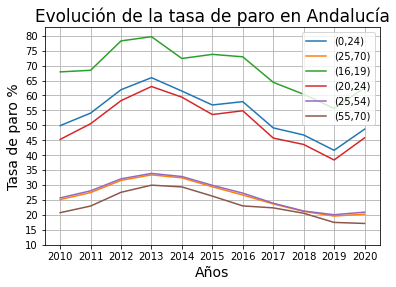

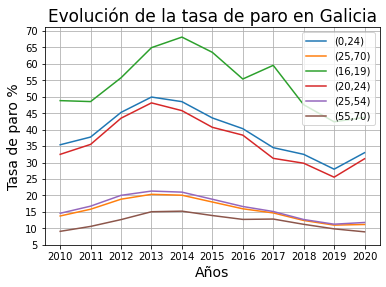

In [25]:
# Pruebas de funcionamiento:

representar_evolucion_paro_cam("Andalucía", TablaDeTasasDeParo)
representar_evolucion_paro_cam("Galicia", TablaDeTasasDeParo)

**Nota.** Observa la cuadrícula. He querido que cada marca de las abscisas tenga su propia línea.

## e) Cálculos de tasas de paro por comunidades y años. Uso de pandas [1,5 puntos]

Este apartado se debe desarrollar usando un dataframe de la librería `pandas`, y partir del mismo archivo de datos csv que ya tenemos. Es decir, ciertamente podríamos partir de otros datos del INE, más apropiados. Pero queremos hacerlo nosotros, simplemente como ejercicio para obligarnos a trabajar con tablas.

Lo primero es cargar el archivo csv en un dataframe. De paso, hacemos algunos ajustes:

- El rótulo "Comunidades y Cuidades Autónomas" es demasiado largo: lo abreviamos como "Coms Auts" por simple comodidad.
      
- A cada comunidad, se le quita el código. 

- Cada edad se transforma en su intervalo según la función anterior
    
- La columna del sexo se elimina.
    
- La columna del total se convierte en el real correspondiente. Recuerda que, en algunos casos, había datos que no describen números.      

In [26]:
# Este apartado debe ser completado por el estudiante
import pandas as pd

def cargar_dataframe(archivo_de_datos):
    """
    Limpia el archivo .csv de paro_tabla_1.csv.
    
    Parameters
    ----------
    df : dataframe
        dataframe con los datos de paro en españa
    df_salida : dataframe
        Un dataframe con los datos limpios.
    
    Returns
    -------
    df_salida : dataframe
        Un dataframe con los datos limpios.
    Precondition
    ------------
    archivo_de_datos : "tabla_paro_1.csv" o similar
    """
    df = pd.read_csv(archivo_de_datos, encoding = 'latin1', sep=';')
    df = df.rename(columns = {'Comunidades y Ciudades Autónomas': 'Coms Auts'})
    df['Coms Auts'] = df['Coms Auts'].apply(lambda palabra: palabra[3:] if palabra != [] and not palabra[0].isalpha() else palabra)  
    df['Edad'] = df['Edad'].map({"Menores de 25 años" : (0, 24), "25 y más años" : (25, 70), "De 16 a 19 años" : (16,19), "De 20 a 24 años" : (20,24), "De 25 a 54 años" : (25,54), "55 y más años" : (55,150)})
    df['Periodo'] = df['Periodo'].str.split("T")
    df['Periodo'] = df['Periodo'].apply(lambda cadena: ((cadena[0]),(cadena[1])))    
    df = df.drop(columns=['Sexo'])    
    df['Total'] = df['Total'].apply( lambda cadena: 0.0 if cadena in ('..','..\n') else float(cadena.replace(',','.')))
    return df

<font color="darkblue">
En este bloque se lee el csv y se pasa a un dataframe de la librería pandas.
<ol>
  <li>Se comienza cambiando el nombre de 'Comunidades y Ciudades Autónomas': 'Coms Auts' con la función .rename.</li>
  <li>A la columna'Coms Auts', se le limpia aplicando una función lambda los numeros que se le asignan a cada comunidad.</li>
  <li>A la columna'Edad', se le aplica una función .map para modificar sus valores str en arrays (int,int) que indiquen el intervalo de edad.</li>
  <li>A la columna'Periodo', se le separa por un .str.split la cadena de caracteres en 2 str(año,trimestre), para posteriormente con una función lambda pasar el str a tipo int.</li>
  <li>A la columna'Total', se le convierte el str en tipo float con una función lambda.</li>
  <li>Se elimina la columana Sexo con .drop por falta de relevancia.</li>
</ol>

In [27]:
# Prueba:

DataFrameTasasDeParo = cargar_dataframe(ArchivoDeDatos)
print(DataFrameTasasDeParo)

      Coms Auts       Edad    Periodo  Total
0     Andalucía    (0, 24)  (2020, 3)  51.53
1     Andalucía    (0, 24)  (2020, 2)  49.94
2     Andalucía    (0, 24)  (2020, 1)  44.67
3     Andalucía    (0, 24)  (2019, 4)  41.00
4     Andalucía    (0, 24)  (2019, 3)  43.70
...         ...        ...        ...    ...
4897    Melilla  (55, 150)  (2011, 1)   3.19
4898    Melilla  (55, 150)  (2010, 4)   8.84
4899    Melilla  (55, 150)  (2010, 3)   0.00
4900    Melilla  (55, 150)  (2010, 2)   3.61
4901    Melilla  (55, 150)  (2010, 1)   0.00

[4902 rows x 4 columns]


Ahora, necesitamos calcular, para una comunidad autónoma y un año dado,
la tasa media de paro como la *media aritmética* de todos los grupos de edad. (V. nota más abajo.)

El resultado, finalmente, se ha de almacenar en un archivo de disco llamado "tasas_de_paro_por_com_aut_y_anno.csv"

** Nota. ** En realidad, la forma correcta de calcular la tasa media es ponderando las tasas de los distintos grupos de edad según sus poblaciones. Pero esto tampoco sería necesario porque las tablas del ine ya nos dan este dato calculado, seleccionando sencillamente el total en cada grupo de edad.

Hace falta arreglar un poco esta tabla, así: limpiar la comunidad autónoma quitando su código, convirtiendo las tasas en reales y suprimiendo el trimestre del año. 

Ahora necesitamos calcular la tasa media de paro de cada comunidad autónoma y año. 

In [28]:
df = DataFrameTasasDeParo
df['Periodo'] = df['Periodo'].apply(lambda cadena: (int(cadena[0])))

<font color="darkblue">
Esta celda es para retirar los trimestres de la columna <i> Periodo </i> y poder trabajar posteriormente.

In [29]:
# Este apartado debe ser completado por el estudiante

def media_com_aux_anno(df):
    """
    Agrupa el df por Comunidades autónomas y el año, filtrando por estos datos la media de paro con esas condiciones.
    
    Parameters
    ----------
    df : dataframe
        dataframe con los datos de paro en españa
    df_salida : dataframe
        Un dataframe con los datos ordenados por Coms y el año.
    
    Returns
    -------
    df_salida : dataframe
        Un dataframe con los datos ordenados por Coms y el año.
    """
    df_salida = df.groupby(by=['Coms Auts','Periodo']).mean().round(2)
    return df_salida

In [30]:
# Pruebas de funcionamiento:

TasasComAutAnno = media_com_aux_anno(DataFrameTasasDeParo)
print(TasasComAutAnno)

                   Total
Coms Auts Periodo       
Andalucía 2010     39.12
          2011     41.93
          2012     48.29
          2013     50.99
          2014     47.99
...                  ...
Rioja, La 2016     27.69
          2017     22.30
          2018     20.39
          2019     19.00
          2020     21.95

[209 rows x 1 columns]


**Nota.** Observa que he forzado la media a dos decimales.

Y ahora se ha de almacenar esta tabla en un archivo de disco, `tasas_de_paro_por_com_aut_y_anno.csv`, usando el separador `";"`.

In [31]:
# Este apartado debe ser completado por el estudiante

TasaDeParoCalculada = "tasas_de_paro_por_com_aut_y_anno.csv"

TasasComAutAnno.to_csv(TasaDeParoCalculada, sep=";", encoding="latin1")

En esta ocasión no hay pruebas de funcionamiento, pero se puede comprobar examinando el archivo `csv` creado, cuyas primeras líneas son las siguientes:

    Comunidades y Ciudades Autónomas;Periodo;Total
    Andalucía;2002;24.6
    Andalucía;2003;23.7
    Andalucía;2004;21.7
    Andalucía;2005;19.1
    
y cuya imagen te muestro seguidamente:

<center>
    <img src="./images/tabla_2_medias.png" width="250">
</center>


## f) Lo mismo pero con map-reduce [1 punto]


Este apartado se ha de realizar un programa aparte que podría activarse así dsede la consola:

    C:\...> python media_por_com_aut.py datos_limpios.txt > tasas_de_paro_por_com_aut_y_anno.txt

Se ve que los parámetros del archivo de datos entrada y de salida son los que se indica en el ejemplo. El de datos, `datos_limpios.txt`, se generó en un apartado anterior, y viendo su contenido, te muestro seguidamente las tres primeras líneas:

    Andalucía;(0, 24);2020;48.71
    Andalucía;(0, 24);2019;41.64
    Andalucía;(0, 24);2018;46.77

El programa funcionará con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`. Tanto el programa en python como los archivos de datos y resultado se han de entregar en una carpeta aparte.

El funcionamiento del mismo se puede activar también desde aquí:

**Enunciado 2**
- Aceptar como buena una función reducer que calcula las medias parciales ponderadas.
- Aceptar una función map-reduce que, finalmente, dé dos resultados: suma y total, de cada tasa (no la media), dirigiendo la salida a un archivo de texto que luego puede ser procesado por otro programa que calcule la media. Esto se considerará válido como el apartado último, de planteamiento libre por parte de cada estudiante.
- Recompensar con medio punto extra a quien logre dar con una solución más correcta, razonando su respuesta. Esto requiere ciertamente indagar un poco más sobre la librería mrjob, porque lo estudiado es básico y no incluye preprocesamiento ni posprocesamiento. Esta posibilidad puede añadirse a la nota final, sustituyendo al apartado último o añadirse a la nota final, aunque ésta no podrá nunca ser superior a un 10.0.

In [32]:
# Hagamos una llamada al programa de consola desde aquí:

! python media_por_com_aut.py datos_limpios.txt

No configs specified for inline runner


<font color="darkblue">
He creado una función que retorna los datos en un archivo.txt

(No te preocupes por las tildes o las eñes, es algo engorroso que nos complica la vida sin mayores consecuencias.)

In [33]:
# Para que el resultado se almacene en un archivo:

! python media_por_com_aut.py datos_limpios.txt -q > tasas_de_paro_por_com_aut_y_anno.txt

No configs specified for inline runner


Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`:

In [34]:
# Mostremos el código fuente del programa mrjobs desde windows:

! type media_por_com_aut.py

# Desde mac o linux, el comando cat, en vez de type

# -*- coding: utf-8 -*-
"""
Created on Tue Mar 16 17:13:22 2021

@author: USUARIO
"""

import sys
from mrjob.job import MRJob

def suma_doble(pares):
    """
    De una lista de valores tipo ((int,int...),(int,int...)) hace un sumatorio
    de las listas.

    Parameters
    ----------
    pares : ((int,int...),(int,int...))
        lista con dos listas dentro.

    Returns
    -------
    a : int
        Sumatorio de la primera lista.
    b : int
        Sumatorio de la segunda lista.

    """
    a, b = 0, 0
    for x, y in pares:
        a, b = a + x, b + y
    return a, b

class MRSumaParos(MRJob):
    """
    FunciÃ³n map_reduce: del archivo datos_limpios.txt, la funciÃ³n mapper limpia
    los datos y retorna key(comunidad, anno), values(paro, 1). Con esto la 
    funciÃ³n reducer suma los paros y el nÃºmeros de datos de paro que se han
    tomado.
    """
    def mapper(self, _, linea):
        comunidad, edad, anno, paro = linea.split(";")
        try:
            paro = float(p

## g) Tasas de las comunidades autónomas en un año. Gráfico de sectores [1 punto]

Se pide ahora una función que reciba un año como parámetro y trace un diagrama de sectores de las tasas de paro de las distintas comunidades autónomas, ese año, a partir de los datos calculados en los apartados anteriores.

In [35]:
# Este apartado debe ser completado por el estudiante

def diagrama_sectores(anno):
    """
    Dada un año devuelve una gráfica con la tasa de paro de ese año por comunidades autónomas segun los datos del archivo
    tabla_paro1.csv
    
    Parameters
    ----------
    data : []
        Lista en la que almacenamos los datos del csv
    diccionario: dict{}
        Diccionario con la tasa de paro para las claves:
            (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre)): Tasa de paro
    trimestres : int
        Variable que se utilizará para contar el número de trimestres por año a la hora de calcular la media del paro.
    paro : int
        Variable que se utilizará para llevar la suma de los paros por año y posteriormente dividir entre trimestres y sacar la avg_paro.
    avg_paro : float
        Variable que se usa para calcular media por año: paro/trimestres.
    comunidades : [str,str,str...]
        Lista que recoge todas las comunidades del archivo de datos
    intervalos : [(int,int),(int,int) ...]
        Lista que recoge todos los intervalos de edad del archivo de datos
    anno : int
        Año del que se van a extraer los datos.
    media : []
        Lista que irá recogiendo la media de la tasa de paro de cada comunidad autónoma.
    contador : int
        Variable que se emplea en contar el número de datos de paro que se han sumado para posteriormente hacer la media.
    parotri : int
        Variable que se utiliza para llevar el sumatorio de los paros por año.
    
    Returns
    -------
    
    Precondition
    ------------
    anno : int  2021 > anno > 2009
    """
    data = []
    trimestres = 0
    paro = 0
    comunidades = []
    intervalos = []
    diccionario = {}
    media = []
    contador = 0
    parotri = 0

    with open('paro_tabla_1.csv', 'r') as f:
        f = f.readlines()[1:]
    for linea in f:
        linea = linea_a_datos(linea)
        if not linea[0] in comunidades:
            comunidades.append(linea[0])
        if not linea[1] in intervalos:
            intervalos.append(linea[1])
        data.append(linea)

    for i in range(len(data)):    
        diccionario[(data[i][0],data[i][1],data[i][2])] = data[i][3]
        
    for com in comunidades:
        for edad in intervalos:
            for tri in range(1,5):
                try:
                    parotri = parotri + diccionario[com,edad,(anno,tri)]
                    trimestres = trimestres + 1
                except:
                    break
            paro = (parotri/trimestres) + paro
            parotri = 0
            trimestre = 0
            contador = contador + 1
            
        avg_paro = paro / contador
        contador = 0
        insertar = (com,avg_paro)
        media.append(avg_paro)

    titulo = "Tasas de paro por comunidades autónomas en " + str(anno)
    fig1, ax, = plt.subplots()
    ax.pie(media, labels=comunidades, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.set(aspect="equal", title= "Tasas de paro por comunidades autónomas en " + str(anno))
    plt.show()
    
    return

<font color="darkblue">
Al igual que el ejercicio de los diccionarios, calculo la media de paro con bucles for utilizando un diccionario, y posteriormente lo muestro con matplotlib y la función .pie

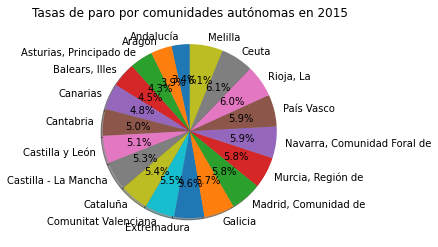

In [36]:
diagrama_sectores(2015)

No nos gusta mucho el diagrama anterior: son muchas comunidades. Te pido que lo rehagas de manera que represente las $k$ de mayor tasa de paro.

In [37]:
# Este apartado debe ser completado por el estudiante
import heapq

def diagrama_sectores_mayores_tasas(anno, k):
    """
    Dada un año devuelve una gráfica con la tasa de paro de ese año por comunidades autónomas segun los datos del archivo
    tabla_paro1.csv
    
    Parameters
    ----------
    data : []
        Lista en la que almacenamos los datos del csv
    diccionario: dict{}
        Diccionario con la tasa de paro para las claves:
            (Comunidad Autónoma, Rango de edad(mínimo, máximo), Periodo(año,trimestre)): Tasa de paro
    trimestres : int
        Variable que se utilizará para contar el número de trimestres por año a la hora de calcular la media del paro.
    paro : int
        Variable que se utilizará para llevar la suma de los paros por año y posteriormente dividir entre trimestres y sacar la avg_paro.
    avg_paro : float
        Variable que se usa para calcular media por año: paro/trimestres.
    comunidades : [str,str,str...]
        Lista que recoge todas las comunidades del archivo de datos
    intervalos : [(int,int),(int,int) ...]
        Lista que recoge todos los intervalos de edad del archivo de datos
    anno : int
        Año del que se van a extraer los datos.
    media : []
        Lista que irá recogiendo la media de la tasa de paro de cada comunidad autónoma.
    contador : int
        Variable que se emplea en contar el número de datos de paro que se han sumado para posteriormente hacer la media.
    parotri : int
        Variable que se utiliza para llevar el sumatorio de los paros por año.
    k : int
        El numero de comunidades con la mayor tasa de empleo de los datos dados.
    k_media : []
        Lista que va recogiendo la media de los k valores.
    k_comun : []
        Lista con el nombre de las k comunidades.
    
    Returns
    -------
    
    Precondition
    ------------
    anno : int  2021 > anno > 2009
    """
    data = []
    trimestres = 0
    paro = 0
    comunidades = []
    intervalos = []
    diccionario = {}
    media = []
    contador = 0
    parotri = 0
    k_media = []
    k_comun = []
    
    with open('paro_tabla_1.csv', 'r') as f:
        f = f.readlines()[1:]
    for linea in f:
        linea = linea_a_datos(linea)
        if not linea[0] in comunidades:
            comunidades.append(linea[0])
        if not linea[1] in intervalos:
            intervalos.append(linea[1])
        data.append(linea)

    for i in range(len(data)):    
        diccionario[(data[i][0],data[i][1],data[i][2])] = data[i][3]

    for com in comunidades:
        for edad in intervalos:
            for tri in range(1,5):
                try:
                    parotri = parotri + diccionario[com,edad,(anno,tri)]
                    trimestres = trimestres + 1
                except:
                    break
            paro = (parotri/trimestres) + paro
            parotri = 0
            trimestre = 0
            contador = contador + 1
            
        avg_paro = paro / contador
        contador = 0
        insertar = (com,avg_paro)
        media.append(avg_paro)

    for i in range(k):
        maxpos = media.index(max(media))
        k_media.append(media[maxpos])
        k_comun.append(comunidades[maxpos])
        media[maxpos] = 0

    fig1, ax, = plt.subplots()
    ax.pie(k_media, labels=k_comun, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.set(aspect="equal", title= "Las " + str(k) + " mayores tasas de paro por comunidad autónoma en " + str(anno))
    plt.show()
    return

<font color="darkblue">
Realizo lo mismo que en la función anterior pero le añado un bucle for que recoge los k valores máximos en una nueva lista k_media, cada vez que recoge el valor máximo le da un valor 0 para no volver a tomar ese valor como máximo.

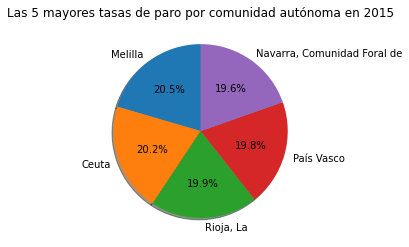

In [38]:
diagrama_sectores_mayores_tasas(2015, 5)

## h) Apartado voluntario [0,5 puntos]

Este enunciado lo dejo a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores.

Función que devuelve las k mayores tasas de paro de todo el histórico de datos, del "archivo paro_por_anno_mapreduce.txt" del apartado anterior.

In [39]:
def mayores_datos(archivo, k = 5):
    """
    Del archivo paro_por_anno_mapreduce.txt devuelve los k valores máximos de la lista.
    
    Parameters
    ----------
    lista_paro : []
        Lista con los valores de paro
    lista_com : []
        Lista con las comunidades autónomas y año.
    paro : []
        Lista con las k mayores tasas de paro
    com : []
        Lista con las k comunidades y año con mayor paro.
    
    Returns
    -------
    
    Precondition
    ------------
    archivo = paro_por_anno_mapreduce.txt
    """
    lista_paro = []
    lista_com = []
    paro = []
    com = []
    with open(archivo, 'r') as f:
        f = f.readlines()
    for linea in f:
        linea = linea.split(";")
        linea[1] = float(linea[1].replace(',','.'))
        lista_com.append(linea[0])
        lista_paro.append(linea[1])
    for i in range(k):
        maxpos = lista_paro.index(max(lista_paro))
        paro.append(lista_paro[maxpos])
        com.append(lista_com[maxpos])
        lista_paro[maxpos] = 0
    print("Los", k, "periodos y Comuniades Autónomas con más paro entre 2010 y 2020")
    for e in range(len(paro)):
        print(e+1, com[e],":", paro[e])
    return

In [40]:
archivo = "paro_por_anno_mapreduce.txt"

mayores_datos(archivo, 5)

Los 5 periodos y Comuniades Autónomas con más paro entre 2010 y 2020
1 Ceuta - 2013 : 52.67
2 Ceuta - 2012 : 52.25
3 Melilla - 2015 : 51.28
4 Andalucía - 2013 : 50.99
5 Canarias - 2013 : 49.59


<font color="darkblue">
He hecho un ejercicio muy parecido al de el gráfico por sectores, recogiendo los valores máximos del archivo de datos <i> "paro_por_anno_mapreduce.txt" </i>, e imprimiéndolos en pantalla.
<ol>
  <li>Se abre el archivo</li>
  <li>Se leen y limpian los datos del archivo.</li>

  <li>Recoje los valores máximos de la lista de tasas de paro.</li>
  <li>Se imprime en pantalla.</li>
</ol>

<hr>

### Datos personales

<font color="darkblue">

-   **Apellidos:** López Bahón
-   **Nombre:** Javier
-   **Email:** javierlopezbahon@gmail.com
-   **Fecha:** 16/03/2021

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

**Comentarios sobre la autoevaluación**: Me he evaluado en función de las salidas de los programas, comparándolas con los resultados del pdf que enviaste, igual se me escapa alguna excepción que no haya podido contemplar.

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0   / 2.0  |Completamente resuelto |
|b)  |1.5   / 1.5  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto|
|d)  |1.0  / 1.0  |Completamente resuelto |
|e)  |1.5   / 1.5  |Completamente resuelto |
|f)  |0.5   / 1.0  |No he conseguido ejecutar el programa estando este dentro de la carpeta map-reduce, no se como abrir el archivo datos_limpios.txt de forma que haya que escribirlo en la terminal y que le recoja de una carpeta anterior a la que está situado, por eso he dejado el programa dentro de la carpeta principal.|
|g)  |0.9   / 1.0  |Completamente resuelto, puede que haya alguna manera más simple de sacar los k mayores |
|h)  |0.1   / 0.5  |Funciona perfectamente, pero no creo que sea de gran complejidad |
|**Total** |**9** / 10.0|**Aprobado**|


<font color="black">
    
### Ayuda recibida y fuentes utilizadas

<br>
    
<font color="darkblue">
En su mayoría han sido busquedas en google, sobre todo en inglés ya que en habla hispana se encuentra menos contenido y normalmente de peor calidad; practicar los ejercicios que enviaste, en especial los de map reduce; y algún que otro video en YouTube. <br>Aquí te dejo algunas de las páginas:
<ol>
  <li>StackOverFlow</li>
  <li>Página Matplotlib</li>
  <li>W3School</li>
  <li>Página Pandas</li>
</ol>

<br>

<br>

<font color="black">
    
### Comentario adicional

<br>

<font color="darkblue">
La verdad que ha sido un proceso más largo de lo que pensaba, ya que según iba avanzando muchas veces tenía que volver atrás para modificar alguna función ya que no se adaptaba a lo que quería en ese momento.<br> La verdad es que he aprendido bastante realizando esta práctica, me hubiese gustado haber indagado más en la función map reduce y haber realizado algo de programación con objetos.<br>El resultado final ha sido satisfactorio y positivo.

<br>

In [41]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor